# IRIS Dataset Walkthrough

In this Notebook, we'll work through some basic Machine Learning Algorithms, and apply them on the IRIS dataset. For anyone who is unfamiliar with the IRIS dataset, you can read about it [here](https://archive.ics.uci.edu/ml/datasets/iris). It's basically the "ML 101" dataset.

## Algorithms to Walkthrough
1. Logistic Regression
2. Support Vector Machine
3. Decision Tree
4. Random Forest (Ensemble/Bagging)
5. Bonus - Mini Neural Network

*As you can probably already tell, this will be a supervised task.*
*We'll be using scikit-learn for the first 4, and Keras for the last.*

## We'll start by loading the data

In [2]:
# import the go-to dataframe library for Python
import pandas as pd 

# Read csv
iris_df = pd.read_csv("iris.csv")

## And we'll explore it a bit

It's important to explore your data to get a feel of what each feature's data type is, it's range, mean, median, mode, etc., all that good stuff. A very quick and simple way of doing this is to use `describe()`, which gives you the 5 number summary, plus a little more.

In [3]:
print(iris_df.head())
print("\n\n")

print("Number of datapoints: ", len(iris_df))
print("\n\n")

print(iris_df.describe())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa



Number of datapoints:  150



               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000   

### Notice how it didn't describe the `Species` column. We can do that on our own.

In [4]:
import numpy as np
unique, counts = np.unique(iris_df['Species'], return_counts=True)
dict(zip(unique, counts))

{'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50}

So there's three different species, each with 50 datapoints.

## Balancing your dataset

It's important to have a well balanced dataset. Here, we have 50 datapoints/instances of each species in the dataset. What would happen if your dataset wasn't balanced? If you were to give a machine 10000 instances of `Iris-setosa`, and 1 instance for each of `Iris-versicolor` and `Iris-virginica`, what do you think would happen? The machine would only learn the features of `Iris-setosa`, and nothing about the other two species. It would then be in the machine's favor to essentially *always* predict that a new flower is an `Iris-setosa`, which is not what we want. This was an extreme example, but you get the idea.

## Splitting into training and testing

Here, we'll split the dataset into training and testing sets. As the names suggest, we will train our algorithm on the training set, and then test it on the testing set. On larger datasets, we may also split out a `validation` set. The validation set is used for intermittent testing. So we would train on the training set, and "validate" the algorithm on the validation set. We still WOULD NOT touch the testing set though. A common split ratio would be 70/20/10 or 70/15/15 for the training, validation, and testing set sizes, respectively. But for our purpose, we'll just do a 80/20 split for training and testing.

### For our walkthrough here, we'll be using the four features `SepalLengthCm`, `SepalWidthCm`, `PetalLengthCm`, and `PetalWidthCm` to predict `Species`.

In [5]:
# We'll shuffle the dataset first
iris_df = iris_df.sample(frac=1)

# Remove the Id column
del iris_df['Id']

In [6]:
# Split out the features and label
X = iris_df.drop('Species', axis=1)
y = iris_df['Species']

# Let's turn these into numpy arrays for easier manipulation
X = X.to_numpy()
y = y.to_numpy()

In [7]:
# Spit into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)

X_train[:5]

array([[4.4, 3.2, 1.3, 0.2],
       [5.4, 3.9, 1.3, 0.4],
       [6.1, 3. , 4.9, 1.8],
       [6.3, 2.5, 5. , 1.9],
       [5.1, 3.7, 1.5, 0.4]])

## [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression)

If you know `Linear Regression`, this should look pretty familiar. As a reminder, `Linear Regression` tries to map a line (it's really a hyperplane) that best fits a set of data points, using the `least squares` method. There is no limit to the domain/range that it predicts on (can be (-inf,inf)). For `Logistic Regression`, we have to limit our predictions to the domain (0,1), to predict probabilities, essentially a binary yes/no situation. In a nutshell (there's much more to this), `Logistic Regression` takes the idea of `Linear Regression`, and maps it to the log scale, and using the [Sigmoid function](https://en.wikipedia.org/wiki/Logistic_function) to guarantee that the output is in the (0,1) range. I use the (0,1) range here to explain in the binary case, but what about the N case, such as the IRIS dataset, where there are 3 classes? Essentially, the [loss function](https://en.wikipedia.org/wiki/Loss_function) is switched to use a [softmax function](https://en.wikipedia.org/wiki/Softmax_function) to extend the algorithm to multi-class. The softmax function is also used heavily by Neural Networks.

[Doc page](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [8]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression().fit(X_train, y_train)

/Users/xte364/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Congratulations! You just trained a classifier. Yes, it's literally one line.
There's many more parameters you can set. Check the scikit-learn doc page.

## Prediction and metrics

Let's first see how well we did on just the training set. That is, we'll check our accuracy on the training set. The logic/intuition here is that if we train an algorithm on the training data, it better predict really well on the training data. Otherwise, we have a problem.

In [9]:
# Predict on the training data
LR_training_predictions = LR_classifier.predict(X_train)

from sklearn.metrics import accuracy_score
accuracy_score(y_train, LR_training_predictions)

# Hopefully you get something close to 1.

0.975

### Now here's the real test. We'll predict on the testing data now, which the algorithm hasn't seen before.

In [10]:
LR_testing_predictions = LR_classifier.predict(X_test)
accuracy_score(y_test, LR_testing_predictions)

# You probably get something slightly lower than your training accuracy, which is correct!

0.9

A helpful way to visualize what we got right/wrong is with a `confusion matrix`.

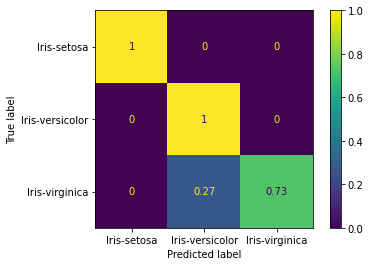

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

np.set_printoptions(precision=2)

confusion_matrix = confusion_matrix(y_test, LR_testing_predictions, normalize='true')
class_names = np.unique(y)
disp = ConfusionMatrixDisplay(confusion_matrix, class_names)

disp.plot()

On the left is the `true` label, and on the bottom is the `predicted` label. This confusion matrix is normalized, so we get percentages. Basically, we want the diagonal from the top left to the bottom right to be as close to 1 as possible.

In [12]:
# Here's a cell just to play around with. Feel free to set your own flower features and predict on it.

dummy_X = [[6.3, 2.9, 5.6, 1.8]]
dummy_prediction = LR_classifier.predict(dummy_X)
print(dummy_prediction)

['Iris-virginica']


## [Support Vector Machine](https://en.wikipedia.org/wiki/Support-vector_machine)

A Support Vector Machine uses the `kernel trick` to try and project the data points in such a way that they are linearly separable. In layman's terms, it tries to transform the dimensions of the data points so that it can fit a hyperplane to separate them as best as possible. Imagine being able to draw a line that perfectly separates your `0`'s and `1`'s. What's a hyperplane? A [hyperplane](https://en.wikipedia.org/wiki/Hyperplane) is a subspace that's `n-1` dimensions. For example, if we're working in a 2d space, the hyperplane is a 1d subspace, hence a line. If we're working in a 3d space, the hyperplane is a 2d subspace, so a rectangle of some sort. For an SVM, the most import data points are the `support vectors`. Those are the data points closest to the hyperplane. As you can imagine, points that are very far away from the hyperplane shouldn't really have much effect on how the hyperplane adjusts. It's the close data points that really provide a lot of information.

[Doc page](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
*Note that scikit-learn has multiple implementations of an SVM*

In [14]:
from sklearn.svm import SVC

SVM_classifier = SVC(decision_function_shape='ovo')
SVM_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Predictions

In [15]:
# We'll predict here
## Predict on training data

SVM_training_predictions = SVM_classifier.predict(X_train)
accuracy_score(y_train, SVM_training_predictions)

0.975

In [16]:
SVM_testing_predictions = SVM_classifier.predict(X_test)
accuracy_score(y_test, SVM_testing_predictions)

0.8666666666666667

Note that just because one algorithm has a lower/higher accuracy than another on one dataset, doesn't make it better/worse. The whole "machine learning" process is a lot of trial and error, which means plugging the dataset into many different algorithms. Different algorithms work better with different datasets. It's up to you to explore them and find the best one.

That being said, some algorithms are more "explainable" than others. It's much easier to explain the weights in a Logistic Regression, than it is to explain those of a huge Neural Network.

Another thing to keep in mind. If a simple algorithm achieves the same results as a complex algorithm, choose the simple one.

## [Decision Tree](https://en.wikipedia.org/wiki/Decision_tree_learning)

A Decision Tree algorithm has many ways to be created. Essentially, it all comes down to which feature we choose to split on, and how we choose that feature. The usual way is to use the `gini index`, which is a way to measure how the probability of an object being classified to a particular class. We calculate the gini index for each column. We prefer to use the column with the least gini index as the root node of our tree. This process of choosing a feature to split on continues until we run out of features, or we hit a set limit. The other popular way of splitting is to calculate the `entropy` of each feature. Both of these ways eventually lead to our `Information Gain` metric.

[Doc page](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

In [17]:
from sklearn.tree import DecisionTreeClassifier

DT_classifier = DecisionTreeClassifier(criterion='gini', )
DT_classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Predictions

In [18]:
# We'll predict here
## Predict on training data

SVM_training_predictions = SVM_classifier.predict(X_train)
accuracy_score(y_train, SVM_training_predictions)

0.975

In [19]:
SVM_testing_predictions = SVM_classifier.predict(X_test)
accuracy_score(y_test, SVM_testing_predictions)

0.8666666666666667

## [Random Forest](https://en.wikipedia.org/wiki/Random_forest)

A Random Forest is essentially a bunch of trees. We split up the data, and train separate trees on each set. During prediction time, we take the majority vote of the trees as the predicted label. Single decision trees have a tendency to "overfit" on a training set. That is, a Decision Tree does not do well when generalizing to new data. That's a whole different topic you can read more about [here](https://en.wikipedia.org/wiki/Overfitting). Essentially what happens is that the single tree gets too deep, and too specific, to perfect its predictions on the training set. It then won't be well applicable to new data. It's been shown that Bagging techniques such as a Random Forest, can combat this.

[Doc page](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Use 5 trees
RF_classifier = RandomForestClassifier(n_estimators=5)
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Predictions

In [25]:
# We'll predict here
## Predict on training data

RF_training_predictions = RF_classifier.predict(X_train)
accuracy_score(y_train, RF_training_predictions)

0.9916666666666667

In [26]:
RF_testing_predictions = RF_classifier.predict(X_test)
accuracy_score(y_test, RF_testing_predictions)

0.9333333333333333

# Neural Network

## So that was an overview of some simple classification algorithms from scikit-learn. There's plenty more where that came from. Now let's look at something more "modern".

Let's use the [Keras](https://keras.io/) library to create a Neural Network. It's most definitely overkill for the IRIS dataset, but since you've already made it this far, might as well finish it.

First, we'll have to do some transformations on the data, as `Keras` works exclusively with numbers only. It's not meant to support the string `Iris-setosa` as a label.

Labels will have to be [one-hot encoded](https://en.wikipedia.org/wiki/One-hot), and we'll scale our features to mean 0 and variance 1, as Neural Networks usually like that better. The scaling of the features also helps for larger datasets which contain larger numbers. Scaling down helps not to blow up the memory on a computer.

### Small note on one-hot encoding
One hot encoding creates a fair representation of our labels that Keras can understand. Since Keras only understands numbers, you may think, "why not just make `Iris-virginica, Iris-versicolor, Iris-setosa` to `1,2,3` respectively?". That's because when predicting labels, and evaluating the cost function (your prediction vs the actual, hence the `error`), there's a distance metric involved. As humans, we understand that each of those species are equally different from each other. But if you were to feed in `1,2,3` to an algorithm, you would be telling it that the second index (2) is closer to the third index (3) than the first index (1) is. That is, you'd be saying that `Iris-versicolor` is closer to `Iris-setosa` than `Iris-virginica` is, which is not correct. The best way to encode each species (label) is with one-hot encoding. We'd turn the species into `[0,0,1],[0,1,0],[1,0,0]`. That way, they are all equidistant from each other, hence it's a fair representation.

In [27]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# One hot encode the labels
enc = OneHotEncoder()
y_encoded = enc.fit_transform(y[:, np.newaxis]).toarray()
print(y_encoded[:10])

print()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:10])

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]

[[ 0.43  0.8   0.93  1.45]
 [-1.14 -1.51 -0.26 -0.26]
 [-1.63 -1.74 -1.4  -1.18]
 [ 0.55  0.57  0.54  0.53]
 [ 1.4   0.34  0.54  0.26]
 [ 1.04  0.11  0.36  0.26]
 [ 2.25 -0.59  1.67  1.05]
 [-0.05 -0.82  0.76  0.92]
 [-1.14 -0.12 -1.34 -1.31]
 [ 1.28  0.11  0.93  1.19]]


## Split into training and testing

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.20, random_state=43)

## Let's make a Neural Network

In [29]:
from keras.models import Sequential
from keras.layers import Dense

n_features = X_scaled.shape[1]
n_classes = y_encoded.shape[1]

model = Sequential()
model.add(Dense(8, input_dim=n_features, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

print(model.summary())

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________
None


## Training

In [30]:
model.fit(X_train, y_train, batch_size=5, epochs=20, verbose=1)

Epoch 1/20
120/120 [==============================] - 0s 657us/step - loss: 0.9149 - accuracy: 0.7333
Epoch 2/20
120/120 [==============================] - 0s 157us/step - loss: 0.8482 - accuracy: 0.8000
Epoch 3/20
120/120 [==============================] - 0s 171us/step - loss: 0.7840 - accuracy: 0.8333
Epoch 4/20
120/120 [==============================] - 0s 176us/step - loss: 0.7230 - accuracy: 0.8417
Epoch 5/20
120/120 [==============================] - 0s 172us/step - loss: 0.6666 - accuracy: 0.8417
Epoch 6/20
120/120 [==============================] - 0s 172us/step - loss: 0.6160 - accuracy: 0.8417
Epoch 7/20
120/120 [==============================] - 0s 175us/step - loss: 0.5720 - accuracy: 0.8333
Epoch 8/20
120/120 [==============================] - 0s 162us/step - loss: 0.5340 - accuracy: 0.8333
Epoch 9/20
120/120 [==============================] - 0s 166us/step - loss: 0.5016 - accuracy: 0.8250
Epoch 10/20
120/120 [==============================] - 0s 175us/step - loss: 0.474

### Careful here. You might be enticed by the accuracy going up along with the number of epochs, which would make you think that if you keep increasing the number of epochs, that you'll get a really godd accuracy. Keep in mind that this is `training` accuracy. And as said before on the topic of `overfitting`, which Neural Networks are notorious for, if you train too much on your training set, your network won't be able to generalize to new datapoints.

In [31]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2867014706134796
Test accuracy: 0.9333333373069763


That's the end of this tutorial. Stay tuned for more!